In [6]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.mpl_style', 'default')
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
plt.rcParams['figure.figsize'] = (15, 5)

c:\users\tea\python\python35\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\tea\python\python35\lib\site-packages\matplotlib\__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
c:\users\tea\python\python35\lib\site-packages\matplotlib\__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Tour de France v zadnjih 5 letih

In [7]:
r2012 = pd.read_csv('Tour-rumena-majica\\2012_0.csv')
r2013 = pd.read_csv('Tour-rumena-majica\\2013_0.csv')
r2014 = pd.read_csv('Tour-rumena-majica\\2014_0.csv')
r2015 = pd.read_csv('Tour-rumena-majica\\2015_0.csv')
r2016 = pd.read_csv('Tour-rumena-majica\\2016_0.csv')

OPOMBE:

a) Določene ekipe so se v preteklih 5 letih večkrat preimenovale
(npr. "Saxo Bank–Tinkoff Bank" ~> "Saxo-Tinkoff" ~> "Tinkoff-Saxo" ~> "Tinkoff")
in sočasno spremenile sestavo(ali pa tudi ne). Da bi se izognila 
zapletom (v kolikšni meri je "nova" ekipa lahko smatrana kot 
ekvivalentna "stari"), obravnavam vse ekipe z različnim imenom
kot samostojne (tj. v zgornjem primeru imamo 4 različne ekipe).

## 1) Končni nosilci rumene majice in zasledovalci 

*Nosilec rumene majice (oz. zmagovalec Toura) je zmagovalec v skupnem seštevku časov vseh etap.*

### Najuspešnejša država/ekipa skozi leta po končni razvrstitvi

V tem razdelku se seveda pojavi problem iz prve opombe. Nekatere ekipe so namreč
prisotne vsa leta, nekatere le eno... Enako je pravzaprav z državami, saj v nasprotju
s "kolesarskimi velesilami" udeležba ostalih ni tako samoumevna.
Poleg tega se pri Touru večkrat govori o ekipah kot o državah, iz katerih prihajajo 
tekmovalci.
Karkorkoli že, za najuspešnejšo štejem tisto ekipo, ki prednjači po vseh kriterijih,
torej tudi po tem, koliko let je sodelovala (pod istim imenom in ne glede na zasedbo).

In [64]:
vse = pd.concat([r2012, r2013, r2014, r2015, r2016])
naj50 = pd.concat([r2012[:50], r2013[:50], r2014[:50], r2015[:50], r2016[:50]])
drzave50 = naj50[['leto', 'mesto', 'ime_tekmovalca', 'država']]
ekipe50 = naj50[['leto', 'mesto', 'ime_tekmovalca', 'ekipa']]

drzave10 = drzave50[drzave50.mesto <= 10]
ekipe10 = ekipe50[ekipe50.mesto <= 10]

najdrzave = drzave10[drzave10.mesto == 1]
najekipe = ekipe10[drzave10.mesto == 1]

,država
Španija,11
Francija,8
Velika Britanija,6
Nizozemska,5
ZDA,3


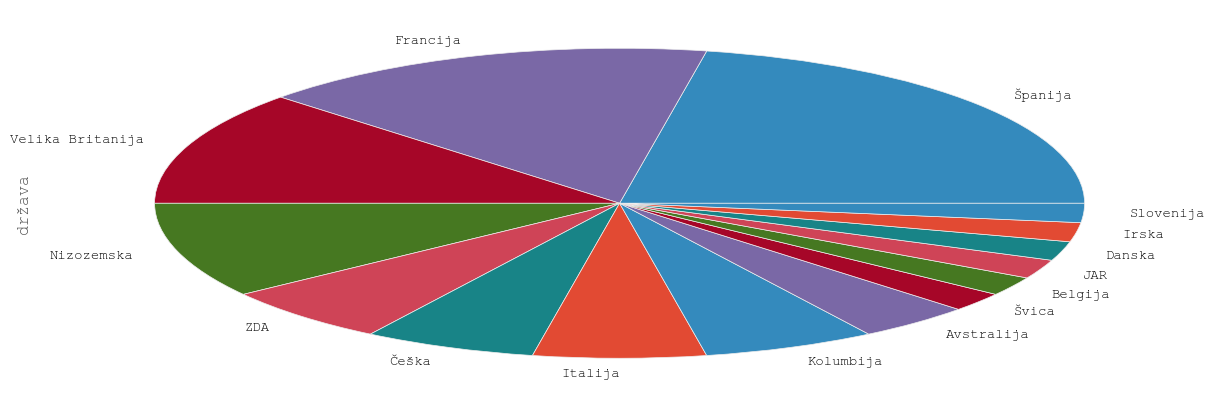

In [66]:
drzave10['država'].value_counts().plot(kind='pie')
pd.DataFrame(drzave10['država'].value_counts())[:5]

,država
Francija,47
Španija,38
Nizozemska,20
Belgija,16
Italija,15


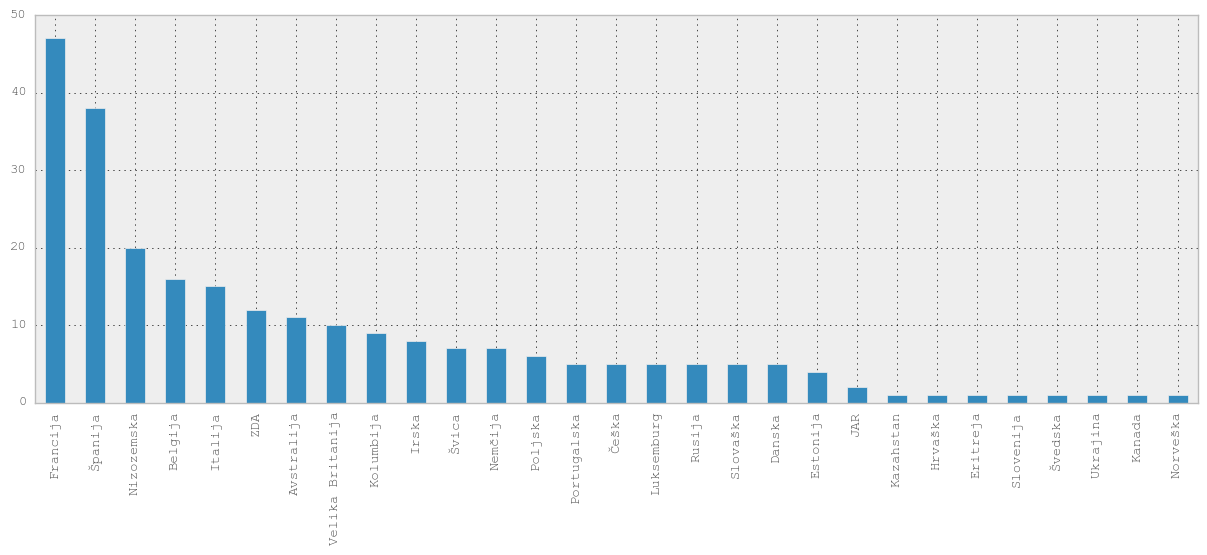

In [75]:
drzave50['država'].value_counts().plot(kind='bar')
pd.DataFrame(drzave50['država'].value_counts())[:5]

,ekipa
Movistar Team,7
Team Sky,5
Astana,4
AG2R La Mondiale,4
BMC Racing Team,4


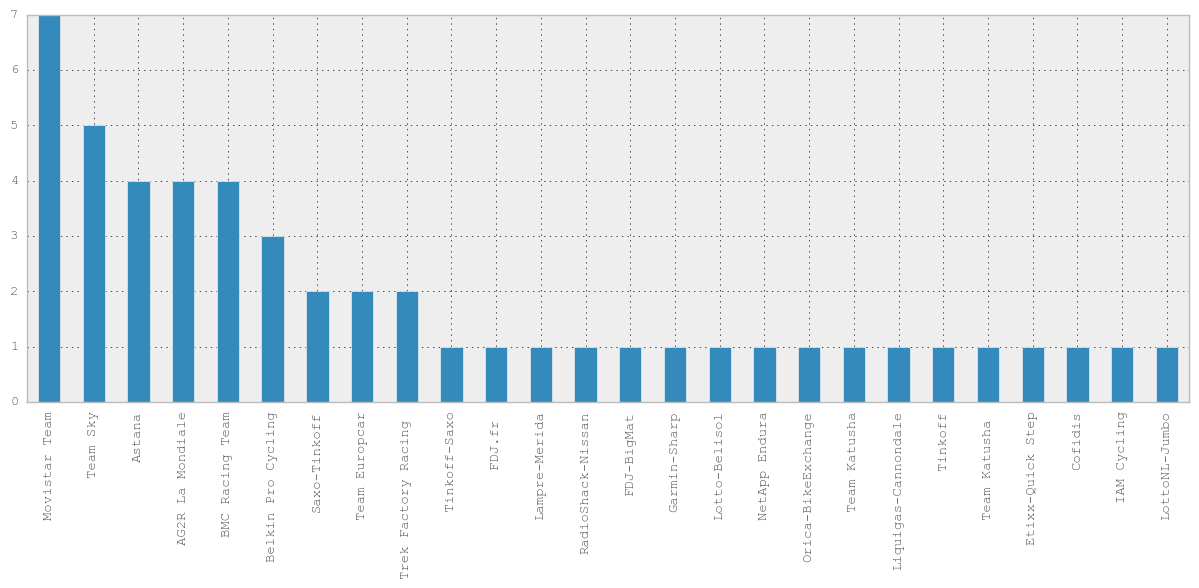

In [71]:
ekipe10['ekipa'].value_counts().plot(kind='bar')
pd.DataFrame(ekipe10['ekipa'].value_counts())[:5]

,ekipa
BMC Racing Team,21
Team Sky,20
Movistar Team,19
Astana,18
AG2R La Mondiale,17


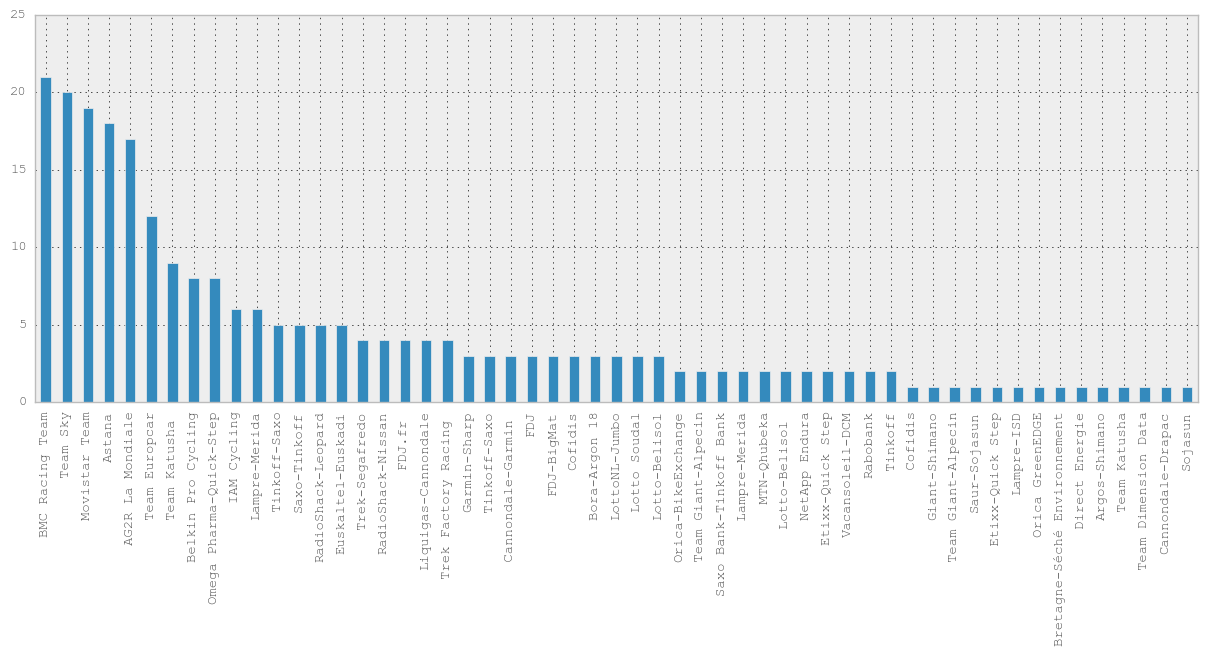

In [57]:
ekipe50['ekipa'].value_counts().plot(kind='bar')
pd.DataFrame(ekipe50['ekipa'].value_counts())[:5]

In [62]:
najekipe

,leto,mesto,ime_tekmovalca,ekipa
0,2012,1,Bradley Wiggins,Team Sky
0,2013,1,Christopher Froome,Team Sky
0,2014,1,Vincenzo Nibali,Astana
0,2015,1,Christopher Froome,Team Sky
0,2016,1,Christopher Froome,Team Sky


In [59]:
najdrzave

,leto,mesto,ime_tekmovalca,država
0,2012,1,Bradley Wiggins,Velika Britanija
0,2013,1,Christopher Froome,Velika Britanija
0,2014,1,Vincenzo Nibali,Italija
0,2015,1,Christopher Froome,Velika Britanija
0,2016,1,Christopher Froome,Velika Britanija


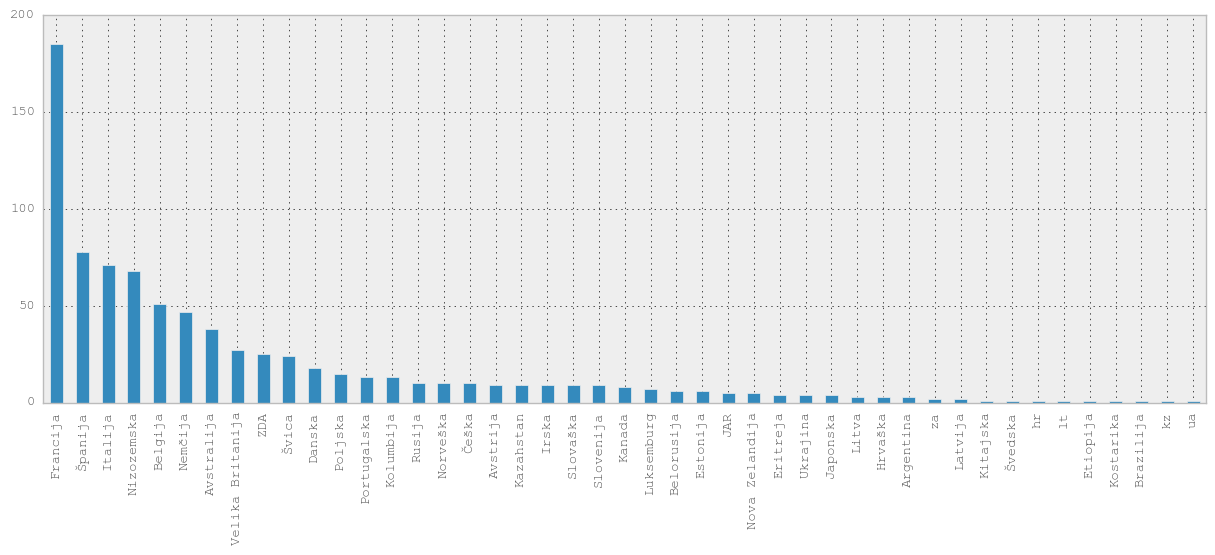

In [76]:
vse['država'].value_counts().plot(kind='bar')

In [ ]:
vse['ekipa'].value_counts()

### Časovni naskoki zmagovalcev

In [100]:
S = naj50[['leto', 'mesto', 'ime_tekmovalca', 'čas']]
najdva = S[S.mesto <= 2]
naskok = S[S.mesto == 2][['leto', 'čas']]

najdva

,leto,mesto,ime_tekmovalca,čas
0,2012,1,Bradley Wiggins,87:34:47
1,2012,2,Christopher Froome,3:21
0,2013,1,Christopher Froome,83:56:40
1,2013,2,Nairo Quintana,4:20
0,2014,1,Vincenzo Nibali,89:59:06
1,2014,2,Jean-Christophe Peraud,7:37
0,2015,1,Christopher Froome,84:46:14
1,2015,2,Nairo Quintana,1:12
0,2016,1,Christopher Froome,89:04:48
1,2016,2,Romain Bardet,4:05


In [102]:
pd.DataFrame(naskok['čas'].sort_values(ascending=False))

,čas
1,7:37
1,4:20
1,4:05
1,3:21
1,1:12


### Slovenci vs. Francozi 

## 2) Statistika etapnih zmag in profili etap

In [10]:
e2012 = pd.read_csv('Etape\\Tour2012.csv')
e2013 = pd.read_csv('Etape\\Tour2013.csv')
e2014 = pd.read_csv('Etape\\Tour2014.csv')
e2015 = pd.read_csv('Etape\\Tour2015.csv')
e2016 = pd.read_csv('Etape\\Tour2016.csv')

### Profili etap - dolžine in frekvenca vrst 

In [90]:
E = pd.concat([e2012, e2013, e2014, e2015, e2016])
et = E[['leto', 'št_etape', 'vrsta_etape', 'dolžina_etape']]
gor = et[et.vrsta_etape == 'gorska'][['leto', 'vrsta_etape', 'dolžina_etape']]
rav = et[et.vrsta_etape == 'ravninska'][['leto', 'vrsta_etape', 'dolžina_etape']]
raz = et[et.vrsta_etape == 'razgibana'][['leto', 'vrsta_etape', 'dolžina_etape']]
kro = et[et.vrsta_etape == 'samostojni kronometer'][['leto', 'vrsta_etape', 'dolžina_etape']]
gkro = et[et.vrsta_etape == 'gorski kronometer'][['leto', 'vrsta_etape', 'dolžina_etape']]

In [ ]:
et['vrsta_etape'].value_counts()

### Najuspešnejša država/ekipa po št. etapnih zmag 

In [54]:
Edrzave = E[['leto', 'št_etape', 'ime_tekmovalca', 'država']]
Eekipe = E[['leto', 'št_etape', 'ime_tekmovalca', 'ekipa']]

### Uspešnost držav/ekip v različnih vrstah etap

In [55]:
edrzave = E[['leto', 'št_etape', 'vrsta_etape', 'ime_tekmovalca', 'država']]
eekipe = E[['leto', 'št_etape', 'vrsta_etape', 'ime_tekmovalca', 'ekipa']]

## 3) Zelena, bela, pikčasta majica, ekipna uvrstitev-najboljših 10

*Končni nosilec zelene majice je zmagovalec po številu zbranih točk na vmesnih sprintih in (odvisno od etape) ciljih etap. Število doseženih točk variira glede na vrsto etape.*

*Seštevek za belo majico je podoben tistemu za rumeno, le da so uvrščeni le kolesarji, mlajši od 25 let.*

*Pikčasto majico osvoji kolesar, ki zbere največ točk na vmesnih gorskih ciljih. Število podeljenih točk je odvisno od kategorije vzpona.*

### Analiza glede na posamezno kategorijo

In [74]:
z2012 = pd.read_csv('Zelena\\Tour2012_2.csv')
z2013 = pd.read_csv('Zelena\\Tour2013_2.csv')
z2014 = pd.read_csv('Zelena\\Tour2014_2.csv')
z2015 = pd.read_csv('Zelena\\Tour2015_2.csv')
z2016 = pd.read_csv('Zelena\\Tour2016_2.csv')

Z = pd.concat([z2012, z2013, z2014, z2015, z2016])

In [60]:
p2012 = pd.read_csv('Pikčasta\\Tour2012_3.csv')
p2013 = pd.read_csv('Pikčasta\\Tour2013_3.csv')
p2014 = pd.read_csv('Pikčasta\\Tour2014_3.csv')
p2015 = pd.read_csv('Pikčasta\\Tour2015_3.csv')
p2016 = pd.read_csv('Pikčasta\\Tour2016_3.csv')

P = pd.concat([p2012, p2013, p2014, p2015, p2016])

In [61]:
b2012 = pd.read_csv('Bela\\Tour2012_4.csv')
b2013 = pd.read_csv('Bela\\Tour2013_4.csv')
b2014 = pd.read_csv('Bela\\Tour2014_4.csv')
b2015 = pd.read_csv('Bela\\Tour2015_4.csv')
b2016 = pd.read_csv('Bela\\Tour2016_4.csv')

B = pd.concat([b2012, b2013, b2014, b2015, b2016])

### Splošna analiza - največ osvojenih majic skozi leta 

In [72]:
majice = pd.concat([Z[Z.mesto == 1], P[P.mesto == 1], B[B.mesto == 1]])[['leto', 'ime_tekmovalca', 'država', 'ekipa', 'vrsta_majice']]
majiced = pd.concat([majice[['leto', 'ime_tekmovalca', 'država', 'vrsta_majice']], 
                     najdrzave[['leto', 'ime_tekmovalca', 'država']]])
majicee = pd.concat([majice[['leto', 'ime_tekmovalca', 'ekipa', 'vrsta_majice']], 
                     najekipe[['leto', 'ime_tekmovalca', 'država']]])